### 계층적 군집 분석의 특징

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

tips = sns.load_dataset("tips")
titanic = sns.load_dataset('titanic')
titanic.dropna(inplace=True)
penguins = sns.load_dataset("penguins")
iris = sns.load_dataset('iris')
dia = sns.load_dataset("diamonds")

In [57]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt

In [59]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [56]:
iris_sub = iris.iloc[:,:-1]

In [60]:
model= AgglomerativeClustering(n_clusters=3)

In [61]:
model.fit(iris.iloc[:,:-1])

AgglomerativeClustering(n_clusters=3)

In [62]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [64]:
iris['cluster'] =model.labels_

In [43]:
pd.crosstab(index=iris['cluster'],columns=iris['species'])

species,setosa,versicolor,virginica
cluster,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [65]:
iris.groupby('cluster').mean() #각 군집의 특성을 대

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,5.920312,2.751562,4.420312,1.434375
1,5.006000,3.428000,1.462000,0.246000
2,6.869444,3.086111,5.769444,2.105556


In [69]:
link = hierarchy.linkage(iris_sub, method='ward')
#mothod 디폴트 = 싱글
link

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

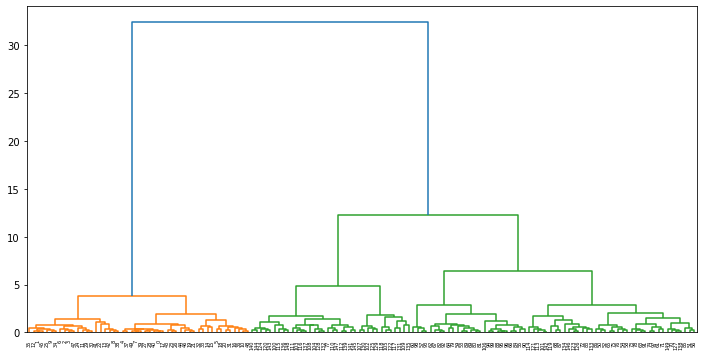

In [70]:
plt.figure(figsize=(12, 6))
hierarchy.dendrogram(link)
plt.show()

In [58]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [60]:
df_1 = iris.head()
df_2 = iris.tail(1)

In [5]:
df = pd.read_csv('data2/diabetes.csv')

In [7]:
df_sub = df.iloc[:,:-1]

In [9]:
from scipy.cluster import hierarchy

In [13]:
model= hierarchy()

TypeError: 'module' object is not callable

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
model = AgglomerativeClustering(n_clusters=4)

In [17]:
model.affinity

'euclidean'

In [18]:
model.fit(df_sub)

AgglomerativeClustering(n_clusters=4)

In [25]:
df['clusete

AttributeError: 'AgglomerativeClustering' object has no attribute 'mean'

In [29]:
model.labels_.shape

(768,)

In [27]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


문제3. 당뇨병 변수를 제외한 나머지 변수를 입력, 계층적 군집분석(n=6), 1번과2번군집의 유클리드 거리

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
model = AgglomerativeClustering(n_clusters=6)

In [34]:
df_sub = df.loc[(df['Pregnancies']==0)&
                (df['BMI']>0),:]

In [38]:
model.fit(df_sub.iloc[:,:-1])

AgglomerativeClustering(n_clusters=6)

In [40]:
df_sub['cluster']= model.labels_

C:\Users\asd\AppData\Local\Temp/ipykernel_21752/4185085254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['cluster']= model.labels_


In [48]:
df_sub.groupby('cluster').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
cluster,,,,,,,,,
0,0.0,122.840909,74.886364,15.795455,0.318182,32.659091,0.508614,31.000000,0.318182
1,0.0,109.121212,74.666667,30.939394,94.424242,36.978788,0.455333,24.060606,0.212121
2,0.0,174.333333,79.333333,35.333333,556.000000,43.400000,0.573667,23.333333,0.666667
3,0.0,134.153846,67.538462,31.076923,195.153846,35.400000,0.682615,25.076923,0.615385
4,0.0,125.555556,0.000000,0.000000,0.000000,34.522222,0.505000,28.444444,0.666667
5,0.0,156.000000,73.333333,33.333333,273.666667,41.300000,0.451500,31.166667,0.166667


In [52]:
diff_sub = df_sub.transpose()

In [53]:
diff_sub

,4,16,45,57,58,59,66,78,83,102,...,649,677,681,682,697,713,727,736,753,757
Pregnancies,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Glucose,137.000,118.000,180.000,100.000,146.000,105.000,109.000,131.00,101.000,125.000,...,107.000,93.000,162.000,95.000,99.000,134.000,141.000,126.000,181.000,123.000
BloodPressure,40.000,84.000,66.000,88.000,82.000,64.000,88.000,0.00,65.000,96.000,...,60.000,60.000,76.000,64.000,0.000,58.000,84.000,86.000,88.000,72.000
SkinThickness,35.000,47.000,39.000,60.000,0.000,41.000,30.000,0.00,28.000,0.000,...,25.000,0.000,36.000,39.000,0.000,20.000,26.000,27.000,44.000,0.000
Insulin,168.000,230.000,0.000,110.000,0.000,142.000,0.000,0.00,0.000,0.000,...,0.000,0.000,0.000,105.000,0.000,291.000,0.000,120.000,510.000,0.000
BMI,43.100,45.800,42.000,46.800,40.500,41.500,32.500,43.20,24.600,22.500,...,26.400,35.300,49.600,44.600,25.000,26.400,32.400,27.400,43.300,36.300
DiabetesPedigreeFunction,2.288,0.551,1.893,0.962,1.781,0.173,0.855,0.27,0.237,0.262,...,0.133,0.263,0.364,0.366,0.253,0.352,0.433,0.515,0.222,0.258
Age,33.000,31.000,25.000,31.000,44.000,22.000,38.000,26.00,22.000,21.000,...,23.000,25.000,26.000,22.000,22.000,21.000,22.000,21.000,26.000,52.000
Outcome,1.000,1.000,1.000,0.000,0.000,0.000,1.000,1.00,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
cluster,3.000,3.000,0.000,1.000,0.000,1.000,0.000,4.00,0.000,0.000,...,0.000,0.000,0.000,1.000,4.000,5.000,0.000,1.000,2.000,0.000


In [54]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [7]:
df = pd.read_csv('data2/iris.csv')

In [13]:
minmax = preprocessing.MinMaxScaler()
minmax_iris = minmax.fit_transform(df.iloc[:,:-1])

In [28]:
#minmax2_iris = minmax.fit(df.iloc[:,:-1])
#minmax2_iris.transform(df.iloc[:,:-1])

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [15]:
iris = pd.DataFrame(minmax_iris, columns=['SL','SW','PL','PW'])

,SL,SW,PL,PW
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [18]:
model= KMeans(n_clusters=3, random_state =123)

In [19]:
model.fit(iris)

KMeans(n_clusters=3, random_state=123)

In [41]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [24]:
model.cluster_centers_

array([[0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

In [35]:
df['cluster'] = model.labels_

In [32]:
iris

,SL,SW,PL,PW,cluster
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,0
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,0
148,0.527778,0.583333,0.745763,0.916667,0


In [40]:
centroid= df.groupby('cluster').mean()
centroid

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
cluster,,,,
0,6.846154,3.082051,5.702564,2.079487
1,5.006000,3.428000,1.462000,0.246000
2,5.888525,2.737705,4.396721,1.418033


In [39]:
centroid.transpose()

cluster,0,1,2
Sepal.Length,6.846154,5.006,5.888525
Sepal.Width,3.082051,3.428,2.737705
Petal.Length,5.702564,1.462,4.396721
Petal.Width,2.079487,0.246,1.418033


In [44]:
pd.crosstab(df.Species, df.cluster)

cluster,0,1,2
Species,,,
setosa,0,50,0
versicolor,3,0,47
virginica,36,0,14
